In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from adjustText import adjust_text
import sys
sys.path.insert(0, '../libs/semaxis/')
from semaxis import CoreUtil
from semaxis import SemAxis
import pandas as pd
import logging
import pickle
import numpy as np
# import spacy
import string
string.punctuation += '➡•’…'
from collections import Counter
import csv

In [2]:
df_intensity_rep = pd.read_csv('second_moment/effect_size_significant_axes_Rep_second_moment_with_corpus_mean_by_party.tsv', sep='\t')
df_intensity_rep.columns = ['axis', 'intens_val_rep', 'intens_p_rep']

In [3]:
df_intensity_rep.head(2)

,axis,intens_val_rep,intens_p_rep
0,"('new', 'worn')",0.005388,0.0
1,"('direct', 'indirect')",0.005168,0.0


In [4]:
len(df_intensity_rep)

345

In [5]:
df_intensity_dem = pd.read_csv('second_moment/effect_size_significant_axes_Dem_second_moment_with_corpus_mean_by_party.tsv', sep='\t')
df_intensity_dem.columns = ['axis', 'intens_val_dem', 'intens_p_dem']

In [6]:
len(df_intensity_dem)

377

In [7]:
df_bias_rep = pd.read_csv('average/effect_size_significant_axes_Rep_average_by_party.tsv', sep='\t')
df_bias_rep.columns = ['axis', 'bias_val_rep', 'bias_p_rep']

In [8]:
len(df_bias_rep)

1084

In [9]:
df_bias_dem = pd.read_csv('average/effect_size_significant_axes_Dem_average_by_party.tsv', sep='\t')
df_bias_dem.columns = ['axis', 'bias_val_dem', 'bias_p_dem']

In [10]:
len(df_bias_dem)

1099

In [11]:
df_intensity_trump = pd.read_csv('second_moment/effect_size_significant_axes_Trump_second_moment_with_corpus_mean_by_party.tsv', sep='\t')
df_intensity_trump.columns = ['axis', 'intens_val_trump', 'intens_p_trump']

In [12]:
len(df_intensity_trump)

256

In [13]:
df_bias_trump = pd.read_csv('average/effect_size_significant_axes_Trump_average_by_party.tsv', sep='\t')
df_bias_trump.columns = ['axis', 'bias_val_trump', 'bias_p_trump']

In [14]:
len(df_bias_trump)

224

## sort by difference in intensity

In [15]:
df_intensity = pd.merge(df_intensity_dem, df_intensity_rep, on='axis', how='inner')

In [16]:
df_intensity = df_intensity.fillna(0)

In [17]:
df_intensity.head()

,axis,intens_val_dem,intens_p_dem,intens_val_rep,intens_p_rep
0,"('new', 'worn')",0.005589,0.0,0.005388,0.0
1,"('direct', 'indirect')",0.005541,0.0,0.005168,0.0
2,"('financial', 'nonfinancial')",0.005476,0.0,0.004911,0.0
3,"('available', 'unavailable')",0.004402,0.0,0.003688,0.0
4,"('reported', 'unreported')",0.004087,0.0,0.003781,0.0


In [18]:
df_intensity['diff_dem_rep'] = df_intensity['intens_val_dem'] - df_intensity['intens_val_rep']
df_intensity['diff_rep_dem'] = df_intensity['intens_val_rep'] - df_intensity['intens_val_dem']

In [19]:
df_all = pd.merge(df_intensity, df_bias_dem, on='axis', how='inner')

In [20]:
df_all = pd.merge(df_all, df_bias_rep, on='axis', how='inner')

In [21]:
len(df_all), len(df_intensity), len(df_bias_dem)

(311, 320, 1099)

In [22]:
df_all.head()

,axis,intens_val_dem,intens_p_dem,intens_val_rep,intens_p_rep,diff_dem_rep,diff_rep_dem,bias_val_dem,bias_p_dem,bias_val_rep,bias_p_rep
0,"('new', 'worn')",0.005589,0.0,0.005388,0.0,0.000201,-0.000201,-0.047521,0.0,-0.046950,0.0
1,"('direct', 'indirect')",0.005541,0.0,0.005168,0.0,0.000373,-0.000373,-0.047922,0.0,-0.048307,0.0
2,"('financial', 'nonfinancial')",0.005476,0.0,0.004911,0.0,0.000564,-0.000564,-0.041128,0.0,-0.036633,0.0
3,"('available', 'unavailable')",0.004402,0.0,0.003688,0.0,0.000713,-0.000713,-0.042062,0.0,-0.040350,0.0
4,"('reported', 'unreported')",0.004087,0.0,0.003781,0.0,0.000307,-0.000307,-0.028256,0.0,-0.027747,0.0


In [23]:
df_all.sort_values(by='diff_dem_rep', ascending=False).head(10)

,axis,intens_val_dem,intens_p_dem,intens_val_rep,intens_p_rep,diff_dem_rep,diff_rep_dem,bias_val_dem,bias_p_dem,bias_val_rep,bias_p_rep
5,"('bound', 'free')",0.004022,0.0,0.002828,0.000,0.001194,-0.001194,0.037947,0.0,0.030385,0.0
14,"('private', 'public')",0.002835,0.0,0.001969,0.000,0.000865,-0.000865,0.032612,0.0,0.024422,0.0
39,"('paid', 'unpaid')",0.001558,0.0,0.000814,0.000,0.000744,-0.000744,-0.022331,0.0,-0.017962,0.0
3,"('available', 'unavailable')",0.004402,0.0,0.003688,0.000,0.000713,-0.000713,-0.042062,0.0,-0.040350,0.0
22,"('dead', 'live')",0.002138,0.0,0.001427,0.000,0.000711,-0.000711,0.030332,0.0,0.028162,0.0
35,"('live', 'recorded')",0.001657,0.0,0.001027,0.000,0.000630,-0.000630,-0.027470,0.0,-0.024651,0.0
2,"('financial', 'nonfinancial')",0.005476,0.0,0.004911,0.000,0.000564,-0.000564,-0.041128,0.0,-0.036633,0.0
12,"('critical', 'noncritical')",0.003283,0.0,0.002735,0.000,0.000548,-0.000548,-0.042491,0.0,-0.041739,0.0
65,"('sure', 'unsure')",0.001098,0.0,0.000577,0.000,0.000521,-0.000521,-0.028791,0.0,-0.024746,0.0
115,"('decreased', 'increased')",0.000629,0.0,0.000112,0.023,0.000518,-0.000518,0.020861,0.0,0.015503,0.0


In [24]:
def extract_top_intense_bias(df, party):
    if party == 'dem':
        top = df.sort_values(by='diff_dem_rep', ascending=False).head(10)
        top_bias = top.bias_val_dem.tolist()[::-1]
        top_intens = top.intens_val_dem.tolist()[::-1]
    elif party == 'rep':
        top = df.sort_values(by='diff_rep_dem', ascending=False).head(10)
        top_bias = top.bias_val_rep.tolist()[::-1]
        top_intens = top.intens_val_rep.tolist()[::-1]

    elif party == 'trump':
        top = pd.merge(df_intensity_trump, df_bias_trump, on='axis', how='inner')
        top = top.sort_values(by='intens_val_trump', ascending=False).head(10)
        top_bias = top.bias_val_trump.tolist()[::-1]
        top_intens = top.intens_val_trump.tolist()[::-1]
    top_axis = top.axis.tolist()[::-1]
    return top_bias, top_axis, top_intens

In [32]:
def extract_top_intense_bias_diff(df, party):
    if party == 'dem':
        top = df.sort_values(by='diff_dem_rep', ascending=False).head(10)
        top_bias = top.bias_val_dem.tolist()[::-1]
        top_intens = top.diff_dem_rep.tolist()[::-1]
    elif party == 'rep':
        top = df.sort_values(by='diff_rep_dem', ascending=False).head(10)
        top_bias = top.bias_val_rep.tolist()[::-1]
        top_intens = top.intens_val_rep.tolist()[::-1]

    top_axis = top.axis.tolist()[::-1]
    return top_bias, top_axis, top_intens

In [33]:
def plot_three():
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(13,6))
    
    color = 'blue'
    title = 'Top intensity microframes (Democratic)'
    top_val_dem, top_axis_dem, top_intens_dem = extract_top_intense_bias(df_all, party='dem')
    
    dem_max = max(top_val_dem)
    dem_min = min(top_val_dem)
    ax1.yaxis.tick_left()
    y = np.arange(10)
    for i in range(10):
        ax1.hlines(i, xmin=dem_min, xmax=dem_max, linewidth=1,color='lightblue', zorder=1)
        ax1.scatter(top_val_dem[i], [i], color=color, s=int(top_intens_dem[i]*80000), zorder=2)
#     ax1.scatter(top_val_dem, y, color=color, s=20, label='Bias', zorder=2)
    ax1.set_yticks(y)
    ax1.yaxis.set_tick_params(length=0)

    ax1.set_yticklabels([eval(item)[0] for item in top_axis_dem], fontsize=15)
    ax1.set_ylim(-0.5,10)
    ax1.vlines(0, ymin=-0.5, ymax=10, linestyle='--', linewidth=1)
    ax1.set_xlabel('Frame bias', fontsize=15)
    ax1.xaxis.set_tick_params(labelsize=15)

    ax_t1 = ax1.twinx()
    ax_t1.yaxis.tick_right()
    ax_t1.set_yticks(y)
    ax_t1.yaxis.set_tick_params(length=0)

    ax_t1.set_yticklabels([eval(item)[1] for item in top_axis_dem], fontsize=15)
    ax_t1.set_ylim(-0.5,10)
    ax_t1.set_title(title, fontsize=15)
    
    ax1.spines["top"].set_visible(False)
    ax1.spines["left"].set_visible(False)
    ax1.spines["right"].set_visible(False)
    ax1.spines["bottom"].set_visible(False)
    ax_t1.spines["top"].set_visible(False)
    ax_t1.spines["left"].set_visible(False)
    ax_t1.spines["right"].set_visible(False)
    ax_t1.spines["bottom"].set_visible(False)

    color = 'red'
    title = 'Top intensity microframes (Republican)'
    top_val_rep, top_axis_rep, top_intens_rep = extract_top_intense_bias(df_all, party='rep')    
    rep_max = max(top_val_rep)
    rep_min = min(top_val_rep)
    ax2.yaxis.tick_left()
    y = np.arange(10)
    for i in range(10):
        ax2.hlines(i, xmin=rep_min, xmax=rep_max, linewidth=1,color='lightcoral', zorder=1)
        ax2.scatter(top_val_rep[i], [i], color=color, s=int(top_intens_rep[i]*80000), zorder=2)

#     ax2.scatter(top_val_rep, y, color=color, s=20, label='Bias', zorder=2)

    ax2.set_yticks(y)
    ax2.yaxis.set_tick_params(length=0)
    ax2.set_yticklabels([eval(item)[0] for item in top_axis_rep], fontsize=15)
    ax2.set_ylim(-0.5,10)
#     for i in range(10):
#         print(i)
#         ax2.set_yticks([i])
#         ax2.set_yticklabels([eval(top_axis_rep[i])[0]], fontsize=15)
    ax2.set_ylim(-0.5,10)
    ax2.vlines(0, ymin=-0.5, ymax=10, linestyle='--', linewidth=1)
#     ax2.legend(prop={'size': 15})
    ax2.set_xlabel('Frame bias', fontsize=15)
    ax2.xaxis.set_tick_params(labelsize=15)

    ax_t2 = ax2.twinx()
    ax_t2.yaxis.tick_right()
    ax_t2.set_yticks(y)
    ax_t2.yaxis.set_tick_params(length=0)
    ax_t2.set_yticklabels([eval(item)[1] for item in top_axis_rep], fontsize=15)
    ax_t2.set_ylim(-0.5,10)
    ax2.set_title(title, fontsize=15)
    ax2.spines["top"].set_visible(False)
    ax2.spines["left"].set_visible(False)
    ax2.spines["right"].set_visible(False)
    ax2.spines["bottom"].set_visible(False)
    ax_t2.spines["top"].set_visible(False)
    ax_t2.spines["left"].set_visible(False)
    ax_t2.spines["right"].set_visible(False)
    ax_t2.spines["bottom"].set_visible(False)
    
#     color = 'orange'
#     title = 'Top intensity microframes (Trump)'
#     top_val_trump, top_axis_trump, top_intens_trump = extract_top_intense_bias(df_intensity_trump, party='trump')    
#     trump_max = max(top_val_trump)
#     trump_min = min(top_val_trump)
#     ax3.yaxis.tick_left()
#     y = np.arange(10)
#     for i in range(10):
#         ax3.hlines(i, xmin=trump_min, xmax=trump_max, linewidth=1,color='lightcoral', zorder=1)
#         ax3.scatter(top_val_trump[i], [i], color=color, s=int(top_intens_trump[i]*90000), zorder=2)

# #     ax2.scatter(top_val_rep, y, color=color, s=20, label='Bias', zorder=2)

#     ax3.set_yticks(y)
#     ax3.yaxis.set_tick_params(length=0)
#     ax3.set_yticklabels([eval(item)[0] for item in top_axis_trump], fontsize=15)
#     ax3.set_ylim(-0.5,10)
# #     for i in range(10):
# #         print(i)
# #         ax2.set_yticks([i])
# #         ax2.set_yticklabels([eval(top_axis_rep[i])[0]], fontsize=15)
#     ax3.set_ylim(-0.5,10)
# #     ax3.vlines(0, ymin=-0.5, ymax=10, linestyle='--', linewidth=1)
# #     ax2.legend(prop={'size': 15})
#     ax3.set_xlabel('Frame bias', fontsize=15)
#     ax3.xaxis.set_tick_params(labelsize=15)

#     ax_t3 = ax3.twinx()
#     ax_t3.yaxis.tick_right()
#     ax_t3.set_yticks(y)
#     ax_t3.yaxis.set_tick_params(length=0)
#     ax_t3.set_yticklabels([eval(item)[1] for item in top_axis_trump], fontsize=15)
#     ax_t3.set_ylim(-0.5,10)
#     ax3.set_title(title, fontsize=15)
#     ax3.spines["top"].set_visible(False)
#     ax3.spines["left"].set_visible(False)
#     ax3.spines["right"].set_visible(False)
#     ax3.spines["bottom"].set_visible(False)
#     ax_t3.spines["top"].set_visible(False)
#     ax_t3.spines["left"].set_visible(False)
#     ax_t3.spines["right"].set_visible(False)
#     ax_t3.spines["bottom"].set_visible(False)
    
    
    
    plt.tight_layout()
    plt.savefig('frame_plot.pdf', format='pdf')

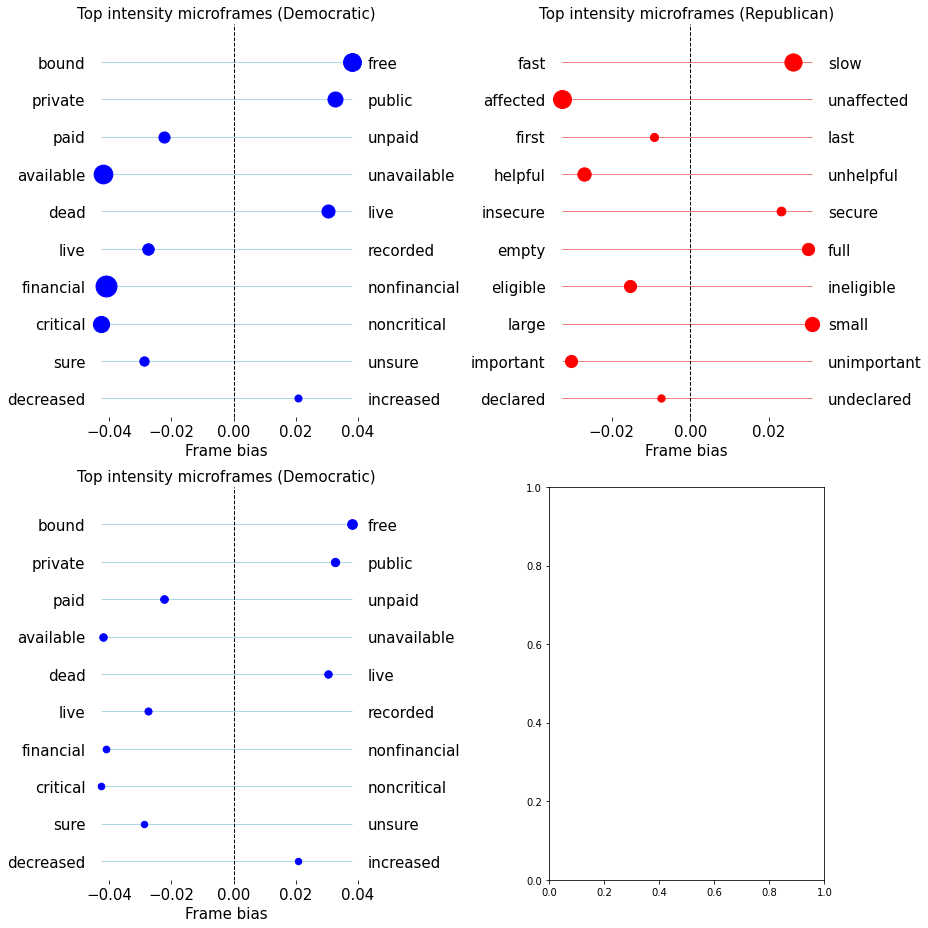

In [34]:
plot_three()

# common microframes

In [31]:
df_all.head(2)

,axis,intens_val_dem,intens_p_dem,intens_val_rep,intens_p_rep,diff_dem_rep,diff_rep_dem,bias_val_dem,bias_p_dem,bias_val_rep,bias_p_rep
0,"('new', 'worn')",0.005589,0.0,0.005388,0.0,0.000201,-0.000201,-0.047521,0.0,-0.046950,0.0
1,"('direct', 'indirect')",0.005541,0.0,0.005168,0.0,0.000373,-0.000373,-0.047922,0.0,-0.048307,0.0


In [54]:
def extract_top_intense_bias_common(df, party):
    if party == 'dem':
        top = df.sort_values(by='intens_val_dem', ascending=False).head(10)
        top_bias = top.bias_val_dem.tolist()[::-1]
        top_intens = top.intens_val_dem.tolist()[::-1]
    elif party == 'rep':
        top = df.sort_values(by='intens_val_rep', ascending=False).head(10)
        top_bias = top.bias_val_rep.tolist()[::-1]
        top_intens = top.intens_val_rep.tolist()[::-1]
    top_axis = top.axis.tolist()[::-1]
    return top_bias, top_axis, top_intens

In [68]:
def plot_three_common():
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(13,6))
    
    color = 'blue'
    title = 'Top intensity microframes (Democratic)'
    top_val_dem, top_axis_dem, top_intens_dem = extract_top_intense_bias_common(df_all, party='dem')
    
    dem_max = max(top_val_dem)
    dem_min = min(top_val_dem)
    ax1.yaxis.tick_left()
    y = np.arange(10)
    for i in range(10):
        ax1.hlines(i, xmin=dem_min, xmax=dem_max, linewidth=1,color='lightblue', zorder=1)
        ax1.scatter(top_val_dem[i], [i], color=color, s=int(top_intens_dem[i]*80000), zorder=2)
#     ax1.scatter(top_val_dem, y, color=color, s=20, label='Bias', zorder=2)
    ax1.set_yticks(y)
    ax1.yaxis.set_tick_params(length=0)

    ax1.set_yticklabels([eval(item)[0] for item in top_axis_dem], fontsize=15)
    ax1.set_ylim(-0.5,10)
    ax1.vlines(0, ymin=-0.5, ymax=10, linestyle='--', linewidth=1)
    ax1.set_xlabel('Frame bias', fontsize=15)
    ax1.xaxis.set_tick_params(labelsize=15)

    ax_t1 = ax1.twinx()
    ax_t1.yaxis.tick_right()
    ax_t1.set_yticks(y)
    ax_t1.yaxis.set_tick_params(length=0)

    ax_t1.set_yticklabels([eval(item)[1] for item in top_axis_dem], fontsize=15)
    ax_t1.set_ylim(-0.5,10)
    ax_t1.set_title(title, fontsize=15)
    
    ax1.spines["top"].set_visible(False)
    ax1.spines["left"].set_visible(False)
    ax1.spines["right"].set_visible(False)
    ax1.spines["bottom"].set_visible(False)
    ax_t1.spines["top"].set_visible(False)
    ax_t1.spines["left"].set_visible(False)
    ax_t1.spines["right"].set_visible(False)
    ax_t1.spines["bottom"].set_visible(False)

    color = 'red'
    title = 'Top intensity microframes (Republican)'
    top_val_rep, top_axis_rep, top_intens_rep = extract_top_intense_bias_common(df_all, party='rep')   
    rep_max = max(top_val_rep)
    rep_min = min(top_val_rep)
    ax2.yaxis.tick_left()
    y = np.arange(10)
    for i in range(10):
        ax2.hlines(i, xmin=rep_min, xmax=rep_max, linewidth=1,color='lightcoral', zorder=1)
        ax2.scatter(top_val_rep[i], [i], color=color, s=int(top_intens_rep[i]*80000), zorder=2)

#     ax2.scatter(top_val_rep, y, color=color, s=20, label='Bias', zorder=2)

    ax2.set_yticks(y)
    ax2.yaxis.set_tick_params(length=0)
    ax2.set_yticklabels([eval(item)[0] for item in top_axis_rep], fontsize=15)
    ax2.set_ylim(-0.5,10)
#     for i in range(10):
#         print(i)
#         ax2.set_yticks([i])
#         ax2.set_yticklabels([eval(top_axis_rep[i])[0]], fontsize=15)
    ax2.set_ylim(-0.5,10)
    ax2.vlines(0, ymin=-0.5, ymax=10, linestyle='--', linewidth=1)
#     ax2.legend(prop={'size': 15})
    ax2.set_xlabel('Frame bias', fontsize=15)
    ax2.xaxis.set_tick_params(labelsize=15)

    ax_t2 = ax2.twinx()
    ax_t2.yaxis.tick_right()
    ax_t2.set_yticks(y)
    ax_t2.yaxis.set_tick_params(length=0)
    ax_t2.set_yticklabels([eval(item)[1] for item in top_axis_rep], fontsize=15)
    ax_t2.set_ylim(-0.5,10)
    ax2.set_title(title, fontsize=15)
    ax2.spines["top"].set_visible(False)
    ax2.spines["left"].set_visible(False)
    ax2.spines["right"].set_visible(False)
    ax2.spines["bottom"].set_visible(False)
    ax_t2.spines["top"].set_visible(False)
    ax_t2.spines["left"].set_visible(False)
    ax_t2.spines["right"].set_visible(False)
    ax_t2.spines["bottom"].set_visible(False)
    
    
    
    plt.tight_layout()
    plt.savefig('frame_plot_common.pdf', format='pdf')

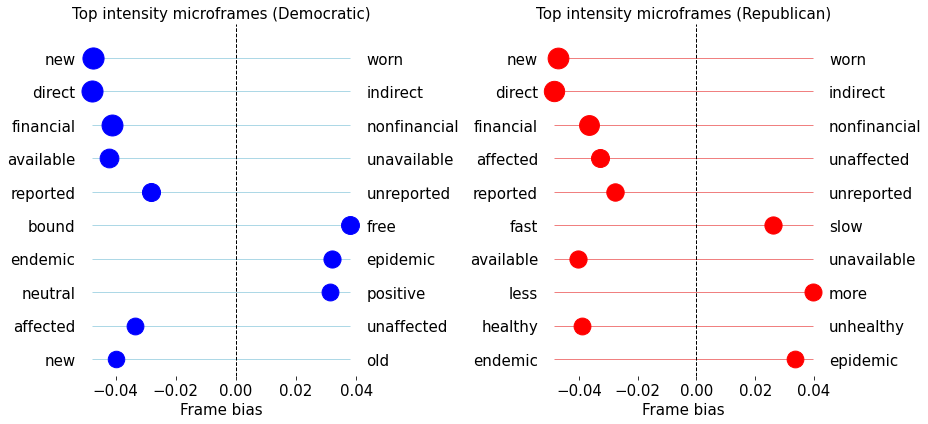

In [69]:
plot_three_common()

## Bar plot

In [40]:
def plot_bar(df_dem, df_rep):
    plot_frame(df_bias_dem, party='dem', option='bias')
    plot_frame(df_bias_rep, party='rep', option='bias')
    plot_frame(df_intensity_dem, party='dem', option='intensity')
    plot_frame(df_intensity_rep, party='rep', option='intensity')
#     ax1.annotate('Arg0',fontsize=15, xy=(0.4, 0.515), xycoords='axes fraction', xytext=(0.2, 0.5), 
#             arrowprops=dict(arrowstyle="->", color='r'))
#     ax1.text(0.4, 0.5, 'Verb: {}'.format(verb), fontsize=15, transform=ax1.transAxes)
#     ax1.annotate('Arg1',fontsize=15, xy=(0.53, 0.515), xycoords='axes fraction', xytext=(0.65, 0.5), 
#             arrowprops=dict(arrowstyle="<-", color='r'))
#     plt.text(9, 5, 'Verb: {}'.format(verb), fontsize=15)
#     plt.text(2, 5, 'Arg0', fontsize=15)
#     plt.text(17, 5, 'Arg1', fontsize=15)

#     ax3.set_title('Verb: {}'.format(verb))



In [41]:
# plot_bar(df_bias_dem, df_bias_rep)

## Difference plot

In [42]:
# df_all.head(2)

In [43]:
# df_all['diff_intensity_dem_rep'] = df_all['intens_val_dem'] - df_all['intens_val_rep']
# df_all['diff_bias_dem_rep'] = df_all['bias_val_dem'] - df_all['bias_val_rep']

In [44]:
# df_all.head(2)

In [45]:
# len(df_all)

In [46]:
# fig, ax = plt.subplots(1, figsize=(20,8))

# bias = df_all['diff_bias_dem_rep'].head(70).tolist()
# intens = df_all['diff_intensity_dem_rep'].head(70).tolist()
# axis = df_all['axis'].head(70).tolist()
# ax.scatter(bias, intens, edgecolors='None', c='black', s=30)
# ax.hlines(0, xmin=min(bias)-0.005, xmax=max(bias)+0.005, linewidth=1, linestyles='dashed', color='black')
# ax.vlines(0, ymin=min(intens)-0.005, ymax=max(intens)+0.005, linewidth=1, linestyles='dashed', color='black')
# ax.set_xlabel('Dem bias - Rep bias', fontsize=15)
# ax.set_ylabel('Dem intensity - Rep intensity', fontsize=15)
# ax.set_xlim(min(bias)-0.005, max(bias)+0.005)
# ax.set_ylim(min(intens)-0.005, max(intens)+0.005)
# # plt.xticks([])
# # plt.yticks([])
# all_text = [ax.text(bias[idx], intens[idx], axis[idx], fontsize=12) for idx in range(len(axis))]
# adjust_text(all_text)#add_objects=[line, rep_l1,rep_l2, rep_l3]


## Top tweets

In [47]:
sa = pickle.load(open('sa_object.p', 'rb'))

In [48]:
top_val_dem, top_axis_dem, top_intens_dem = extract_top_intense_bias(df_all, party='dem')

In [49]:
top_val_rep, top_axis_rep, top_intens_rep = extract_top_intense_bias(df_all, party='rep')    

In [50]:
top_axis_dem

["('decreased', 'increased')",
 "('sure', 'unsure')",
 "('critical', 'noncritical')",
 "('financial', 'nonfinancial')",
 "('live', 'recorded')",
 "('dead', 'live')",
 "('available', 'unavailable')",
 "('paid', 'unpaid')",
 "('private', 'public')",
 "('bound', 'free')"]

In [51]:
def get_top_tweet(df, party):
    axes_text = {}
    if party == 'dem':
        axes = top_axis_dem
    elif party == 'rep':
        axes = top_axis_rep
    for axis in axes:
        df_sorted = df.sort_values(by=axis, ascending=False)
#         text_list = []
#         cnt = 0
#         for idx, row in df_sorted.drop_duplicates().head(100).iterrows():
#             if row['text'].split()[0][0] != '@' and row['text'].split()[0][0] != '#' and len(row['text'].split()) > 2:
#                 text_list.append(row['text'])
#                 cnt += 1
#             if cnt == 10:
#                 break        
        axes_text[axis] = df_sorted.head(5).text.tolist() 
    axes_text = pd.DataFrame(axes_text.items())
    axes_text.columns=['axis', 'top_text']
#     word_contrib_df = word_contrib_df[word_contrib_df['word'] != 'rt']
    return axes_text

In [52]:
df = pd.read_csv('big_table_by_second_moment_with_corpus_mean.tsv', sep='\t',quoting=csv.QUOTE_NONE,error_bad_lines=False)

In [53]:
df.head(2)

,party,text,"('abaxial', 'adaxial')","('able', 'unable')","('abnormal', 'normal')","('aboral', 'oral')","('abridged', 'unabridged')","('absent', 'present')","('absolute', 'relative')","('abstemious', 'gluttonous')",...,"('unwrinkled', 'wrinkled')","('unwritten', 'written')","('useful', 'useless')","('valuable', 'worthless')","('vernal', 'wintry')","('virtuous', 'wicked')","('waning', 'waxing')","('weightless', 'weighty')","('winged', 'wingless')","('wired', 'wireless')"
0,Dem,"today, we intro'd the bipartisan #corpsact to ...",0.001718,0.010009,0.005607,0.004492,0.006692,0.005622,0.004581,0.002958,...,0.003612,0.005709,0.006416,0.004411,0.004112,0.004965,0.005399,0.002757,0.003239,0.005158
1,Dem,thanks to agnes keeney for putting her skills ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
df.party.value_counts()

Bg                                                                                                                                         413607
Dem                                                                                                                                         15620
Rep                                                                                                                                          9961
                                                                                                                                              601
                                                                                                                                              599
                                                                                                                                            ...  
i will keep demanding the accountability, action, &amp; leadership we need from this administration.                        

In [55]:
cols = top_axis_dem + top_axis_rep + ['party', 'text']

In [56]:
df = df[cols]

In [57]:
len(df)

685415

In [58]:
# df = df.dropna(subset=["('able', 'unable')"])

In [59]:
df_text_dem = df[df['party'] == 'Dem']

In [60]:
df_text_rep = df[df['party'] == 'Rep']

In [70]:
df_trump = pd.read_csv('big_table_by_second_moment_with_corpus_mean_trump.tsv', sep='\t',quoting=csv.QUOTE_NONE,error_bad_lines=False)

In [71]:
len(df_trump)

12484

In [73]:
df_trump.party.value_counts()

Bg                                                                                                                7790
to help them keep up the fight, our emergency…                                                                      21
covid                                                                                                               16
house democrats passed…                                                                                             14
                                                                                                                    13
                                                                                                                  ... 
this is a promising step forward – and we must keep working together to protect americans’ health and safety.        1
atrocious greed.                                                                                                     1
we all should be prepared.                      

In [72]:
df_trump.head()

,party,text,"('abaxial', 'adaxial')","('able', 'unable')","('abnormal', 'normal')","('aboral', 'oral')","('abridged', 'unabridged')","('absent', 'present')","('absolute', 'relative')","('abstemious', 'gluttonous')",...,"('unwrinkled', 'wrinkled')","('unwritten', 'written')","('useful', 'useless')","('valuable', 'worthless')","('vernal', 'wintry')","('virtuous', 'wicked')","('waning', 'waxing')","('weightless', 'weighty')","('winged', 'wingless')","('wired', 'wireless')"
0,Trump,rt @skynews: oxford's covid vaccine is reporte...,0.002741,0.013377,0.006402,0.007055,0.006935,0.007788,0.004118,0.003777,...,0.003162,0.004879,0.004386,0.006235,0.005742,0.004463,0.005146,0.002878,0.006083,0.007640
1,Trump,rt @jsolomonreports: florida democratic party ...,0.002277,0.008078,0.006774,0.005208,0.006802,0.004672,0.002750,0.003560,...,0.001740,0.005490,0.002793,0.006234,0.002529,0.002285,0.002804,0.002085,0.005944,0.004972
2,Trump,"rt @franklin_graham: .@thehermancain, a great ...",0.002162,0.024327,0.009242,0.005432,0.012484,0.004337,0.002974,0.004223,...,0.003033,0.006773,0.004273,0.012000,0.005021,0.003300,0.006852,0.001325,0.003230,0.006565
3,Trump,rt @actforamerica: imagine if the left was foc...,0.004429,0.007223,0.007882,0.004167,0.006658,0.003974,0.002623,0.003528,...,0.007063,0.002775,0.004628,0.009032,0.004815,0.007200,0.002255,0.002597,0.004350,0.003808
4,Trump,rt @teamtrump: thanks to unprecedented action ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
df_text_rep.head(2)

,"('decreased', 'increased')","('sure', 'unsure')","('critical', 'noncritical')","('financial', 'nonfinancial')","('live', 'recorded')","('dead', 'live')","('available', 'unavailable')","('paid', 'unpaid')","('private', 'public')","('bound', 'free')",...,"('large', 'small')","('eligible', 'ineligible')","('empty', 'full')","('insecure', 'secure')","('helpful', 'unhelpful')","('first', 'last')","('affected', 'unaffected')","('fast', 'slow')",party,text
25101,0.008118,0.012171,0.018185,0.013930,0.010891,0.015763,0.018609,0.006333,0.012992,0.019662,...,0.017983,0.01291,0.016375,0.011395,0.016571,0.006406,0.014408,0.005816,Rep,rt @skynews: oxford's covid vaccine is reporte...
25102,0.009002,0.010693,0.022257,0.016787,0.010643,0.010194,0.031417,0.008293,0.012784,0.014911,...,0.011758,0.00818,0.011947,0.004097,0.010800,0.004034,0.012004,0.005770,Rep,rt @jsolomonreports: florida democratic party ...


In [62]:
# len(df), len(df.drop_duplicates())

In [65]:
top_dem_tweet = get_top_tweet(df_text_dem, 'dem')

In [67]:
top_dem_tweet

,axis,top_text
0,"('decreased', 'increased')",[check to see if you qualify for paid sick lea...
1,"('sure', 'unsure')","[#md02 constituents, unsure where to turn for ..."
2,"('critical', 'noncritical')",[rt @frankpallone: .@who is critical in the fi...
3,"('financial', 'nonfinancial')","[thank you, @abigaildisney, for looking out fo..."
4,"('live', 'recorded')",[tune in now: i'm hosting a facebook live town...
5,"('dead', 'live')",[tune in now: i'm hosting a facebook live town...
6,"('available', 'unavailable')",[more information is available from @cdcgov he...
7,"('paid', 'unpaid')",[check to see if you qualify for paid sick lea...
8,"('private', 'public')","[rt @indivisibleteam: medicines, like the covi..."
9,"('bound', 'free')",[free covid covid testing is available near yo...


In [66]:
for i in range(len(top_dem_tweet)):
    print(top_dem_tweet.axis.tolist()[i])
    print(top_dem_tweet.top_text.tolist()[i])
    print()

('decreased', 'increased')
['check to see if you qualify for paid sick leave because of the covid here 👇 ', 'rt @facttank: new: as covid spreads, which u.s workers have paid sick leave – and which don’t? ', 'rt @facttank: new: as covid spreads, which u.s workers have paid sick leave – and which don’t? ', 'i stand with @pattymurray and @sengillibrand and support the paid leave act to provide additional support to workers &amp; businesses for paid family and sick leave during the covid outbreak. ', 'today, the house will vote on our next covid response legislation to provide americans w/paid family and medical leave, increased federal medicaid funds to support our state public health partners, free testing, &amp; emergency sick leave for those impacted by the virus. (2/3)']

('sure', 'unsure')
['#md02 constituents, unsure where to turn for local covid resources? check out the below graphic for the hotline for your county. ', 'the least the president can do is make sure they have the equi

In [68]:
top_rep_tweet = get_top_tweet(df_text_rep, 'rep')

In [69]:
for i in range(len(top_rep_tweet)):
    print(top_rep_tweet.axis.tolist()[i])
    print(top_rep_tweet.top_text.tolist()[i])
    print()

('declared', 'undeclared')
['my statement after president @realdonaldtrump declared a #nationalemergency to respond to covid. ', 'the first public health emergency was declared on march 6 and allows the state to increase coordination across all levels of government in the state’s response to covid.', 'president @realdonaldtrump has declared today as national day of prayer. please join me in praying for our country as we continue to respond to the covid pandemic.', 'president @realdonaldtrump has declared today as national day of prayer. please join me in praying for our country as we continue to respond to the covid pandemic.', 'earlier this afternoon, i declared a state of emergency to help utah prepare for diagnoses of covid in our state. this means we are in a state of readiness. watch this video to learn more. covid ']

('important', 'unimportant')
['important information for you and your family about the covid ', 'important information from @cdcgov regarding covid ⤵️ ', 'important